# Capstone Project - Customer Persona Generator
_Author: Chi-Yuan (Tina) Peng_

_Date: Dec. 2022_

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('../data/labeled_result.csv')
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,num_family_member,single_parent,total_spent,PrWines,PrFruits,PrMeatProducts,PrFishProducts,PrSweetProducts,PrGoldProds,label
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,D
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,1,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,C
2,58293.0,94,173,43,118,46,27,15,5,5,...,2,0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,A
3,62513.0,16,520,42,98,0,42,14,2,6,...,2,0,716,0.726257,0.058659,0.136872,0.000000,0.058659,0.019553,A
4,55635.0,34,235,65,164,50,49,27,4,7,...,1,1,590,0.398305,0.110169,0.277966,0.084746,0.083051,0.045763,A


## Statistical Analysis

In [3]:
df_res = round(df['label'].value_counts(normalize = True),2).rename_axis('group').to_frame('group_size').sort_index()
df_res

,group_size
group,
A,0.21
B,0.23
C,0.31
D,0.24


### 1. Personal Info Columns:
- Income
- Total Spent
- Age
- Number of Family Member
- Number of Kids

In [4]:
df.groupby('label')[['Income']].describe()

Income                                                                   \
       count          mean           std      min      25%      50%       75%   
label                                                                           
A      468.0  63764.694444  10550.007458  32727.0  56970.5  63361.5  69305.25   
B      514.0  29483.904669  14042.149637   1730.0  21652.5  27521.0  36116.25   
C      693.0  42455.210678  11661.421261   4023.0  35544.0  42386.0  49678.00   
D      535.0  75544.981308  13074.912742   2447.0  69498.0  75903.0  82275.00   

                 
            max  
label            
A      157733.0  
B      156924.0  
C      162397.0  
D      160803.0

In [5]:
df.groupby('label')[['total_spent']].describe()

total_spent                                                          \
            count         mean         std    min     25%     50%     75%   
label                                                                       
A           468.0   944.777778  379.053919   59.0   661.0   902.5  1156.5   
B           514.0    97.535019  106.584379    5.0    34.0    59.5   102.0   
C           693.0   181.896104  160.085989    8.0    48.0   121.0   284.0   
D           535.0  1353.467290  435.965413  277.0  1036.5  1334.0  1638.0   

               
          max  
label          
A      2092.0  
B       577.0  
C       797.0  
D      2525.0

In [6]:
df.groupby('label')[['age']].describe()

age                                                     
       count       mean        std   min    25%   50%   75%   max
label                                                            
A      468.0  59.634615   9.981623  32.0  52.00  59.0  68.0  84.0
B      514.0  48.428016  10.507385  28.0  40.25  47.0  54.0  79.0
C      693.0  56.721501   9.934413  32.0  50.00  56.0  65.0  78.0
D      535.0  55.407477  13.454401  29.0  45.00  54.0  67.0  83.0

In [7]:
df.groupby('label')[['num_family_member']].describe()

num_family_member                                             
                  count      mean       std  min  25%  50%  75%  max
label                                                               
A                 468.0  1.692308  0.737047  0.0  1.0  2.0  2.0  4.0
B                 514.0  1.515564  0.770276  0.0  1.0  2.0  2.0  4.0
C                 693.0  2.222222  0.754349  1.0  2.0  2.0  3.0  4.0
D                 535.0  0.766355  0.635696  0.0  0.0  1.0  1.0  2.0

In [8]:
df.groupby('label')[['num_child']].describe()

num_child                                             
          count      mean       std  min  25%  50%  75%  max
label                                                       
A         468.0  1.021368  0.531223  0.0  1.0  1.0  1.0  3.0
B         514.0  0.881323  0.595239  0.0  1.0  1.0  1.0  3.0
C         693.0  1.551227  0.621660  0.0  1.0  1.0  2.0  3.0
D         535.0  0.166355  0.377738  0.0  0.0  0.0  0.0  2.0

In [9]:
df.groupby('label')[['not_live_alone']].describe()

not_live_alone                                             
               count      mean       std  min  25%  50%  75%  max
label                                                            
A              468.0  0.670940  0.470375  0.0  0.0  1.0  1.0  1.0
B              514.0  0.634241  0.482111  0.0  0.0  1.0  1.0  1.0
C              693.0  0.670996  0.470191  0.0  0.0  1.0  1.0  1.0
D              535.0  0.600000  0.490356  0.0  0.0  1.0  1.0  1.0

#### Collect the summary results into `df_res`

In [10]:
cols_info = ['Income', 'total_spent', 'age', 'num_family_member', 'num_child', 'not_live_alone']
cols_name = ['income', 'spending', 'age', 'num_family_member', 'num_child', 'not_live_alone']

for i, cols in enumerate(cols_info):
    df_res['%s_q1' %(cols_name[i])] = df.groupby('label')[cols].describe()['25%'].to_list()
    df_res['%s_q3' %(cols_name[i])] = df.groupby('label')[cols].describe()['75%'].to_list()
df_res

,group_size,income_q1,income_q3,spending_q1,spending_q3,age_q1,age_q3,num_family_member_q1,num_family_member_q3,num_child_q1,num_child_q3,not_live_alone_q1,not_live_alone_q3
group,,,,,,,,,,,,,
A,0.21,56970.5,69305.25,661.0,1156.5,52.00,68.0,1.0,2.0,1.0,1.0,0.0,1.0
B,0.23,21652.5,36116.25,34.0,102.0,40.25,54.0,1.0,2.0,1.0,1.0,0.0,1.0
C,0.31,35544.0,49678.00,48.0,284.0,50.00,65.0,2.0,3.0,1.0,2.0,0.0,1.0
D,0.24,69498.0,82275.00,1036.5,1638.0,45.00,67.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Adjust `spending_range` column
Transfer to spending level, ex. 'High', 'Medium', and 'Low'. Set the highest spendind group to 'High' and lowest group to 'Low.'

In [11]:
df_res['spending_level'] = df_res['spending_q1'].rank(method = 'max', ascending = False).to_list()
df_res['spending_level'] = df_res['spending_level'].map({1: 'High', len(df_res): 'Low'}).fillna('Medium')
df_res

,group_size,income_q1,income_q3,spending_q1,spending_q3,age_q1,age_q3,num_family_member_q1,num_family_member_q3,num_child_q1,num_child_q3,not_live_alone_q1,not_live_alone_q3,spending_level
group,,,,,,,,,,,,,,
A,0.21,56970.5,69305.25,661.0,1156.5,52.00,68.0,1.0,2.0,1.0,1.0,0.0,1.0,Medium
B,0.23,21652.5,36116.25,34.0,102.0,40.25,54.0,1.0,2.0,1.0,1.0,0.0,1.0,Low
C,0.31,35544.0,49678.00,48.0,284.0,50.00,65.0,2.0,3.0,1.0,2.0,0.0,1.0,Medium
D,0.24,69498.0,82275.00,1036.5,1638.0,45.00,67.0,0.0,1.0,0.0,0.0,0.0,1.0,High


#### Adjust `not_live_alone_range` column
Transfer 0 to 'Single' and 1 to 'Married'

In [12]:
df_res['not_live_alone_q1'] = df_res['not_live_alone_q1'].map({1: 'Married', 0: 'Single'})
df_res['not_live_alone_q3'] = df_res['not_live_alone_q3'].map({1: 'Married', 0: 'Single'})

#### Add another column `married_pr`
to recode the percentage of customers in the group being 'Married.'

In [13]:
df_res['married_pr'] = df.groupby('label')['not_live_alone'].mean().to_list()

In [14]:
df_res

,group_size,income_q1,income_q3,spending_q1,spending_q3,age_q1,age_q3,num_family_member_q1,num_family_member_q3,num_child_q1,num_child_q3,not_live_alone_q1,not_live_alone_q3,spending_level,married_pr
group,,,,,,,,,,,,,,,
A,0.21,56970.5,69305.25,661.0,1156.5,52.00,68.0,1.0,2.0,1.0,1.0,Single,Married,Medium,0.670940
B,0.23,21652.5,36116.25,34.0,102.0,40.25,54.0,1.0,2.0,1.0,1.0,Single,Married,Low,0.634241
C,0.31,35544.0,49678.00,48.0,284.0,50.00,65.0,2.0,3.0,1.0,2.0,Single,Married,Medium,0.670996
D,0.24,69498.0,82275.00,1036.5,1638.0,45.00,67.0,0.0,1.0,0.0,0.0,Single,Married,High,0.600000


### 2. Product preference
#### Wines

In [15]:
df[['PrWines']].mean()

PrWines    0.459083
dtype: float64

In [16]:
df.groupby('label')[['PrWines']].describe()

PrWines                                                              \
        count      mean       std       min       25%       50%       75%   
label                                                                       
A       468.0  0.645544  0.160053  0.156772  0.535126  0.665008  0.762083   
B       514.0  0.191417  0.127039  0.000000  0.080000  0.178571  0.277778   
C       693.0  0.579246  0.166895  0.194712  0.444444  0.578692  0.702857   
D       535.0  0.397484  0.142374  0.000578  0.292028  0.393289  0.496686   

                 
            max  
label            
A      0.952030  
B      0.625000  
C      0.963303  
D      0.789976

#### Fruits

In [17]:
df[['PrFruits']].mean()

PrFruits    0.049444
dtype: float64

In [18]:
df.groupby('label')[['PrFruits']].describe()

PrFruits                                                         \
         count      mean       std  min       25%       50%       75%   
label                                                                   
A        468.0  0.029020  0.031150  0.0  0.008577  0.018807  0.039228   
B        514.0  0.097123  0.073183  0.0  0.045455  0.083333  0.133333   
C        693.0  0.021362  0.027758  0.0  0.000000  0.013158  0.033333   
D        535.0  0.057877  0.047313  0.0  0.021865  0.047387  0.078117   

                 
            max  
label            
A      0.200326  
B      0.445545  
C      0.235294  
D      0.262153

#### Meats

In [19]:
df[['PrMeatProducts']].mean()

PrMeatProducts    0.24908
dtype: float64

In [20]:
df.groupby('label')[['PrMeatProducts']].describe()

PrMeatProducts                                                    \
               count      mean       std       min       25%       50%   
label                                                                    
A              468.0  0.189019  0.094850  0.034539  0.127744  0.173318   
B              514.0  0.248485  0.114933  0.000000  0.161409  0.238095   
C              693.0  0.222391  0.105229  0.025751  0.141689  0.214286   
D              535.0  0.336760  0.136972  0.010830  0.244256  0.329032   

                           
            75%       max  
label                      
A      0.242020  0.568720  
B      0.322246  0.675393  
C      0.297297  0.547170  
D      0.423267  0.997110

#### Fish

In [21]:
df[['PrFishProducts']].mean()

PrFishProducts    0.071527
dtype: float64

In [22]:
df.groupby('label')[['PrFishProducts']].describe()

PrFishProducts                                                         \
               count      mean       std  min       25%       50%       75%   
label                                                                         
A              468.0  0.037726  0.038824  0.0  0.011537  0.025092  0.053717   
B              514.0  0.141331  0.105083  0.0  0.066807  0.128516  0.193407   
C              693.0  0.033114  0.039785  0.0  0.000000  0.021242  0.050000   
D              535.0  0.083788  0.058687  0.0  0.037619  0.070663  0.119356   

                 
            max  
label            
A      0.183030  
B      0.590909  
C      0.212766  
D      0.318290

#### Sweets

In [23]:
df[['PrSweetProducts']].mean()

PrSweetProducts    0.050798
dtype: float64

In [24]:
df.groupby('label')[['PrSweetProducts']].describe()

PrSweetProducts                                                         \
                count      mean       std  min       25%       50%       75%   
label                                                                          
A               468.0  0.030397  0.034052  0.0  0.008273  0.019008  0.041888   
B               514.0  0.097323  0.079986  0.0  0.040900  0.076923  0.140556   
C               693.0  0.022244  0.028618  0.0  0.000000  0.011494  0.035556   
D               535.0  0.060933  0.059596  0.0  0.025774  0.047885  0.085655   

                 
            max  
label            
A      0.182609  
B      0.600000  
C      0.227891  
D      0.945848

#### Gold

In [25]:
df[['PrGoldProds']].mean()

PrGoldProds    0.120068
dtype: float64

In [26]:
df.groupby('label')[['PrGoldProds']].describe()

PrGoldProds                                                         \
            count      mean       std  min       25%       50%       75%   
label                                                                      
A           468.0  0.068294  0.056499  0.0  0.027613  0.047410  0.098705   
B           514.0  0.224322  0.124953  0.0  0.125000  0.214286  0.316667   
C           693.0  0.121644  0.097781  0.0  0.047170  0.095238  0.169811   
D           535.0  0.063157  0.052834  0.0  0.024135  0.047980  0.088589   

                 
            max  
label            
A      0.309659  
B      0.894150  
C      0.699519  
D      0.312842

#### Deal Products

In [27]:
df[['NumDealsPurchases']].mean()

NumDealsPurchases    2.325339
dtype: float64

In [28]:
df.groupby('label')[['NumDealsPurchases']].describe()

NumDealsPurchases                                              
                  count      mean       std  min  25%  50%  75%   max
label                                                                
A                 468.0  3.220085  2.285009  0.0  2.0  3.0  4.0  15.0
B                 514.0  1.817121  1.339757  0.0  1.0  1.0  2.0  15.0
C                 693.0  2.873016  1.929698  0.0  1.0  2.0  4.0  15.0
D                 535.0  1.321495  1.366193  0.0  1.0  1.0  1.0  15.0

#### Collect the summary results into `df_res`

In [29]:
products = ['Wine', 'Fruits', 'Meats', 'Seafood', 'Sweets', 'Gold', 'On-sale']
product_cols = df.filter(regex = '^Pr', axis = 1).columns.to_list()
product_cols.append('NumDealsPurchases')
ly = [[] for i in range(len(df_res))]
for j, pro in enumerate(product_cols):
    for i, group_mean in enumerate(df.groupby('label')[pro].mean()):
        if group_mean >= df[pro].mean()+0.05:
            ly[i].append(products[j])
df_res['pro_preference'] = ly
df_res

,group_size,income_q1,income_q3,spending_q1,spending_q3,age_q1,age_q3,num_family_member_q1,num_family_member_q3,num_child_q1,num_child_q3,not_live_alone_q1,not_live_alone_q3,spending_level,married_pr,pro_preference
group,,,,,,,,,,,,,,,,
A,0.21,56970.5,69305.25,661.0,1156.5,52.00,68.0,1.0,2.0,1.0,1.0,Single,Married,Medium,0.670940,"[Wine, On-sale]"
B,0.23,21652.5,36116.25,34.0,102.0,40.25,54.0,1.0,2.0,1.0,1.0,Single,Married,Low,0.634241,"[Seafood, Gold]"
C,0.31,35544.0,49678.00,48.0,284.0,50.00,65.0,2.0,3.0,1.0,2.0,Single,Married,Medium,0.670996,"[Wine, On-sale]"
D,0.24,69498.0,82275.00,1036.5,1638.0,45.00,67.0,0.0,1.0,0.0,0.0,Single,Married,High,0.600000,[Meats]


### Output the result dataframe for the application on streamlit

In [30]:
df_res.to_csv('../data/summary_result.csv')

## Visualization

In [31]:
df_plot = df.sort_values(by = 'label').reset_index()
df_plot.head()

,index,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,num_family_member,single_parent,total_spent,PrWines,PrFruits,PrMeatProducts,PrFishProducts,PrSweetProducts,PrGoldProds,label
0,1287,60894.0,61,606,7,155,10,0,54,5,...,2,0,832,0.728365,0.008413,0.186298,0.012019,0.000000,0.064904,A
1,432,57959.0,71,430,16,322,43,24,33,5,...,1,1,868,0.495392,0.018433,0.370968,0.049539,0.027650,0.038018,A
2,431,55707.0,91,208,7,82,30,66,35,2,...,2,0,428,0.485981,0.016355,0.191589,0.070093,0.154206,0.081776,A
3,922,64831.0,51,480,86,249,75,86,144,8,...,2,1,1120,0.428571,0.076786,0.222321,0.066964,0.076786,0.128571,A
4,923,56067.0,51,517,12,54,16,6,120,2,...,2,0,725,0.713103,0.016552,0.074483,0.022069,0.008276,0.165517,A


In [32]:
color = ['#FF165D', '#ADE792', '#3EC1D3', '#FFD36E']
num_color = ['#FCECDD', '#FFC288', '#FEA82F', '#FF6701']
bi_color = ['#C0D8C0', '#DD4A48']

C:\Users\shashank.sahoo\AppData\Local\Temp\ipykernel_22824\2697970325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df_plot["label"], palette = color)


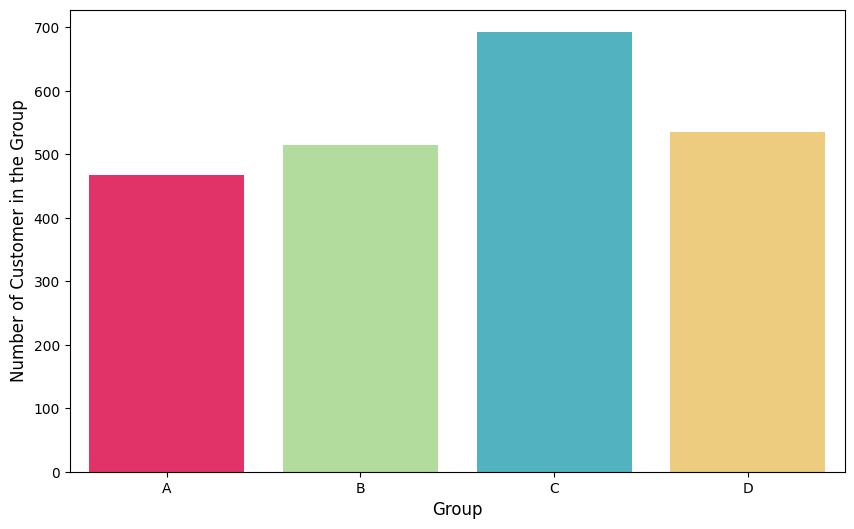

In [33]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot["label"], palette = color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer in the Group', fontsize = 12);

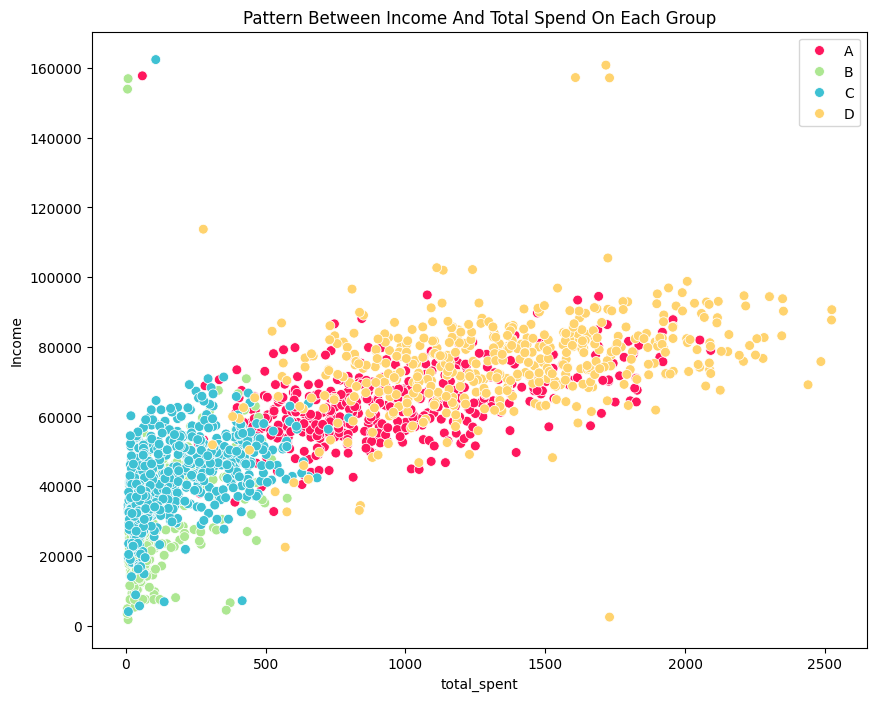

In [34]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_plot, x = df_plot["total_spent"], y = df_plot["Income"], 
                hue = df_plot["label"], palette = color, s = 50)
plt.title("Pattern Between Income And Total Spend On Each Group")
plt.legend();

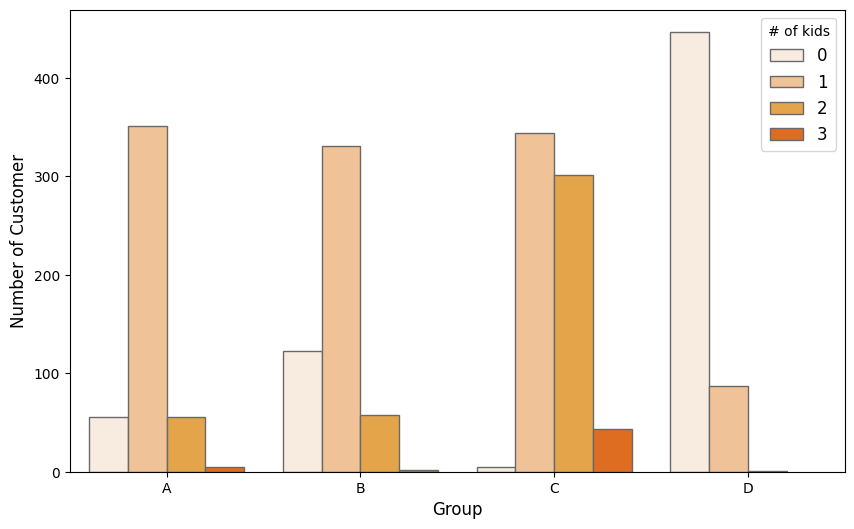

In [36]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot['label'], hue = df_plot['num_child'], edgecolor = 'dimgray', palette = num_color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.legend(title = '# of kids', fontsize = 12);

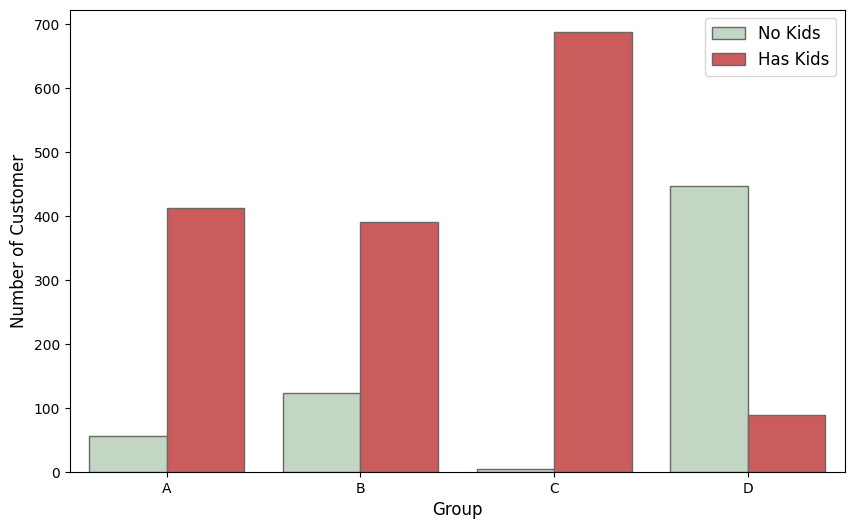

In [37]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot['label'], hue = df_plot['has_child'], edgecolor = 'dimgray', palette = bi_color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.legend(['No Kids', 'Has Kids'], fontsize = 12);

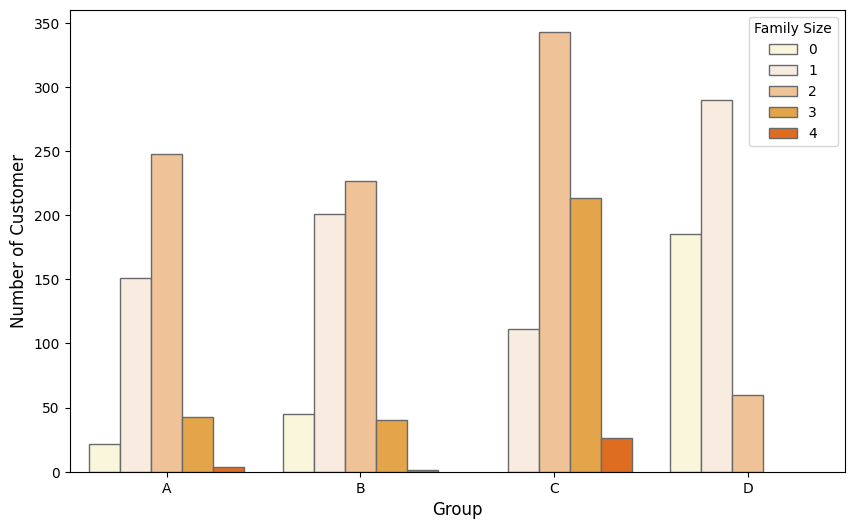

In [38]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot['label'], hue = df_plot['num_family_member'], 
              edgecolor = 'dimgray', palette = ['#FFFAD7'] + num_color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.legend(title = 'Family Size', fontsize = 10);

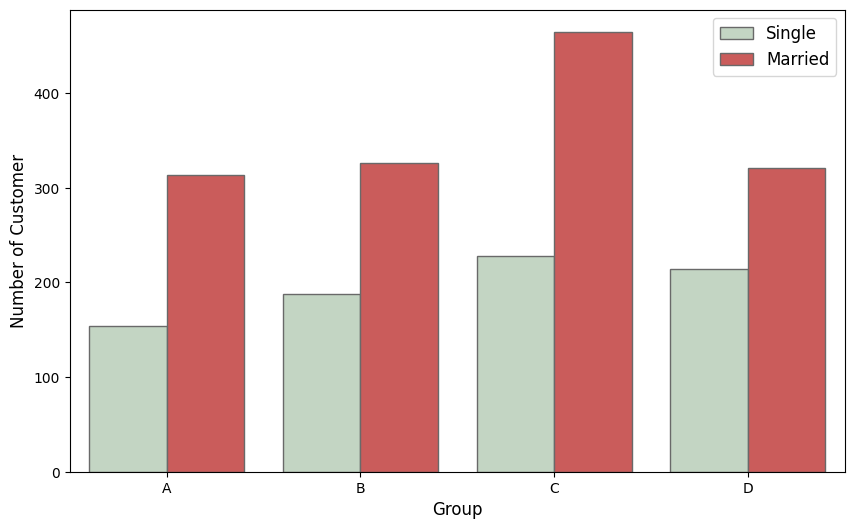

In [39]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot['label'], hue = df_plot['not_live_alone'], edgecolor = 'dimgray', palette = bi_color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.legend(['Single', 'Married'], fontsize = 12);

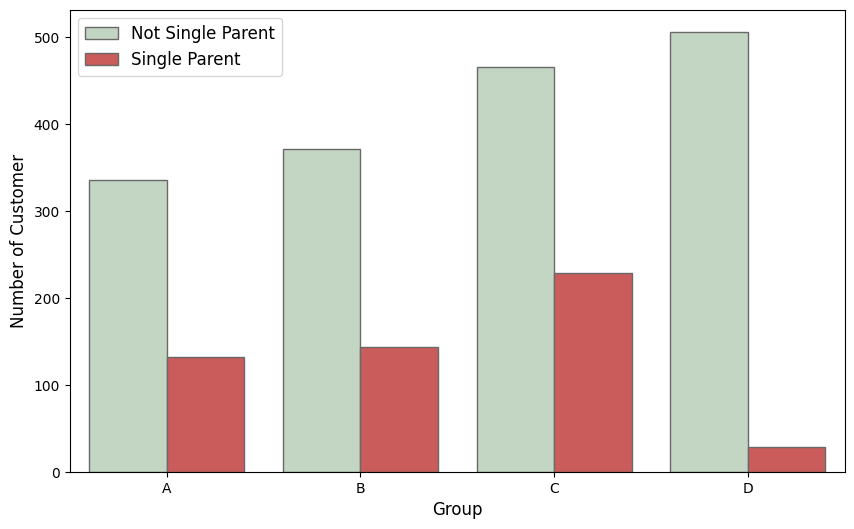

In [40]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df_plot['label'], hue = df_plot['single_parent'], edgecolor = 'dimgray', palette = bi_color)
plt.xlabel('Group', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.legend(['Not Single Parent', 'Single Parent'], fontsize = 12);

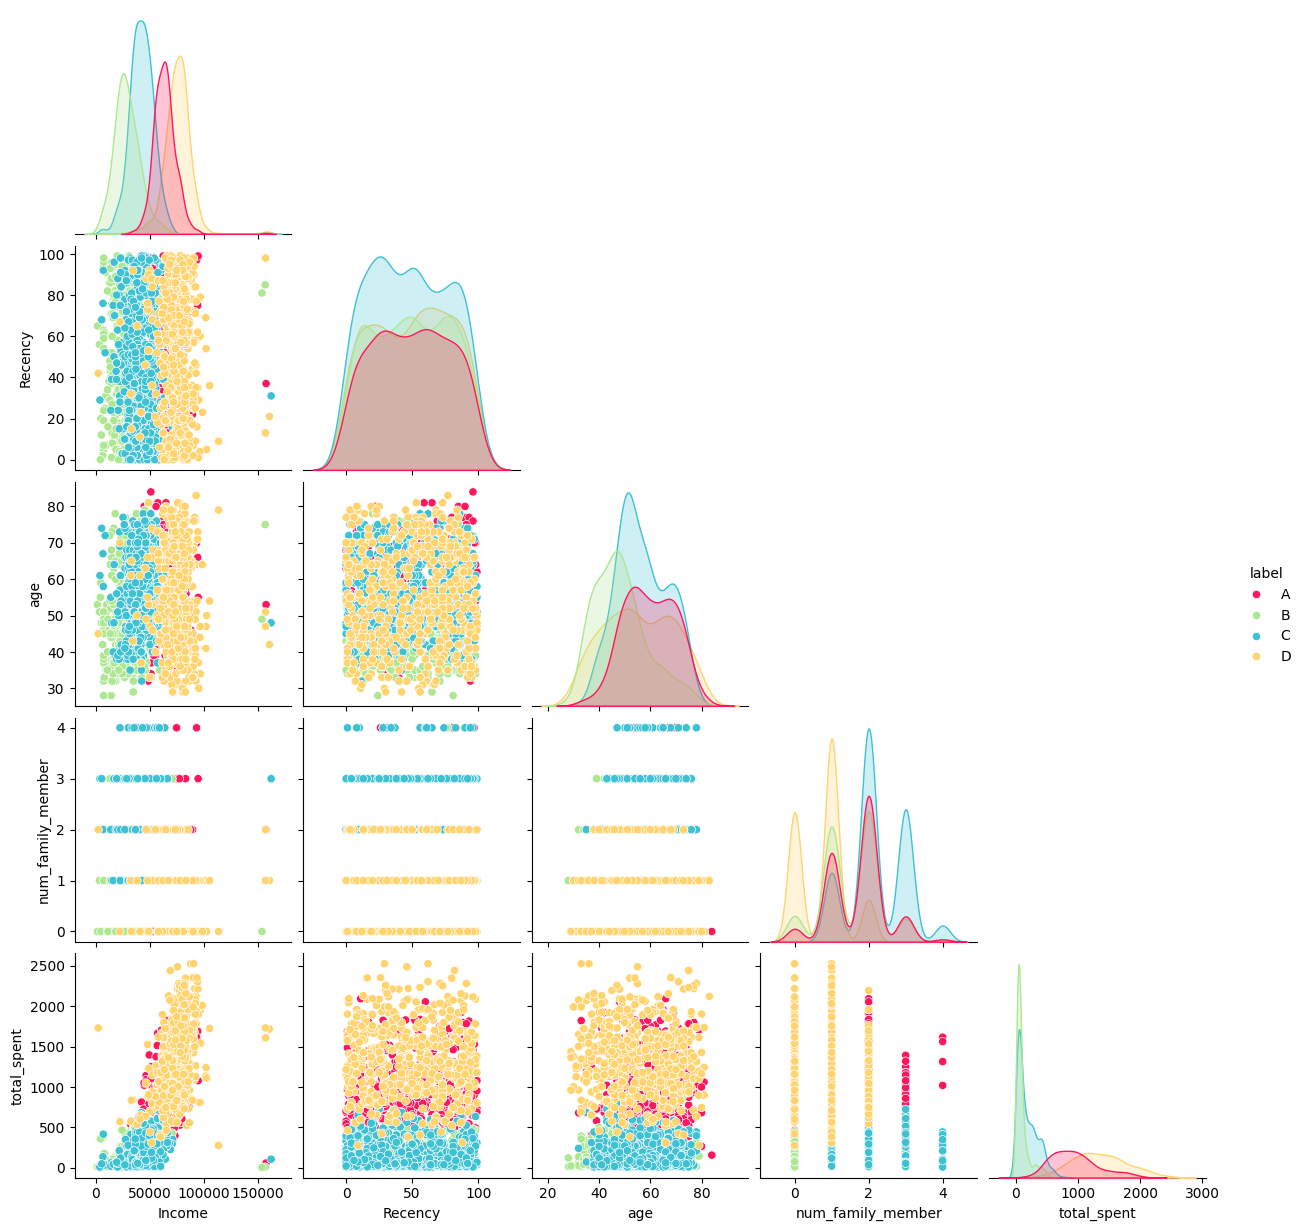

In [41]:
cols_plot_info = ['Income', 'Recency', 'age', 'num_family_member', 'total_spent', 'label']

sns.pairplot(data = df_plot[cols_plot_info], hue = 'label', 
             palette = color, corner = True);

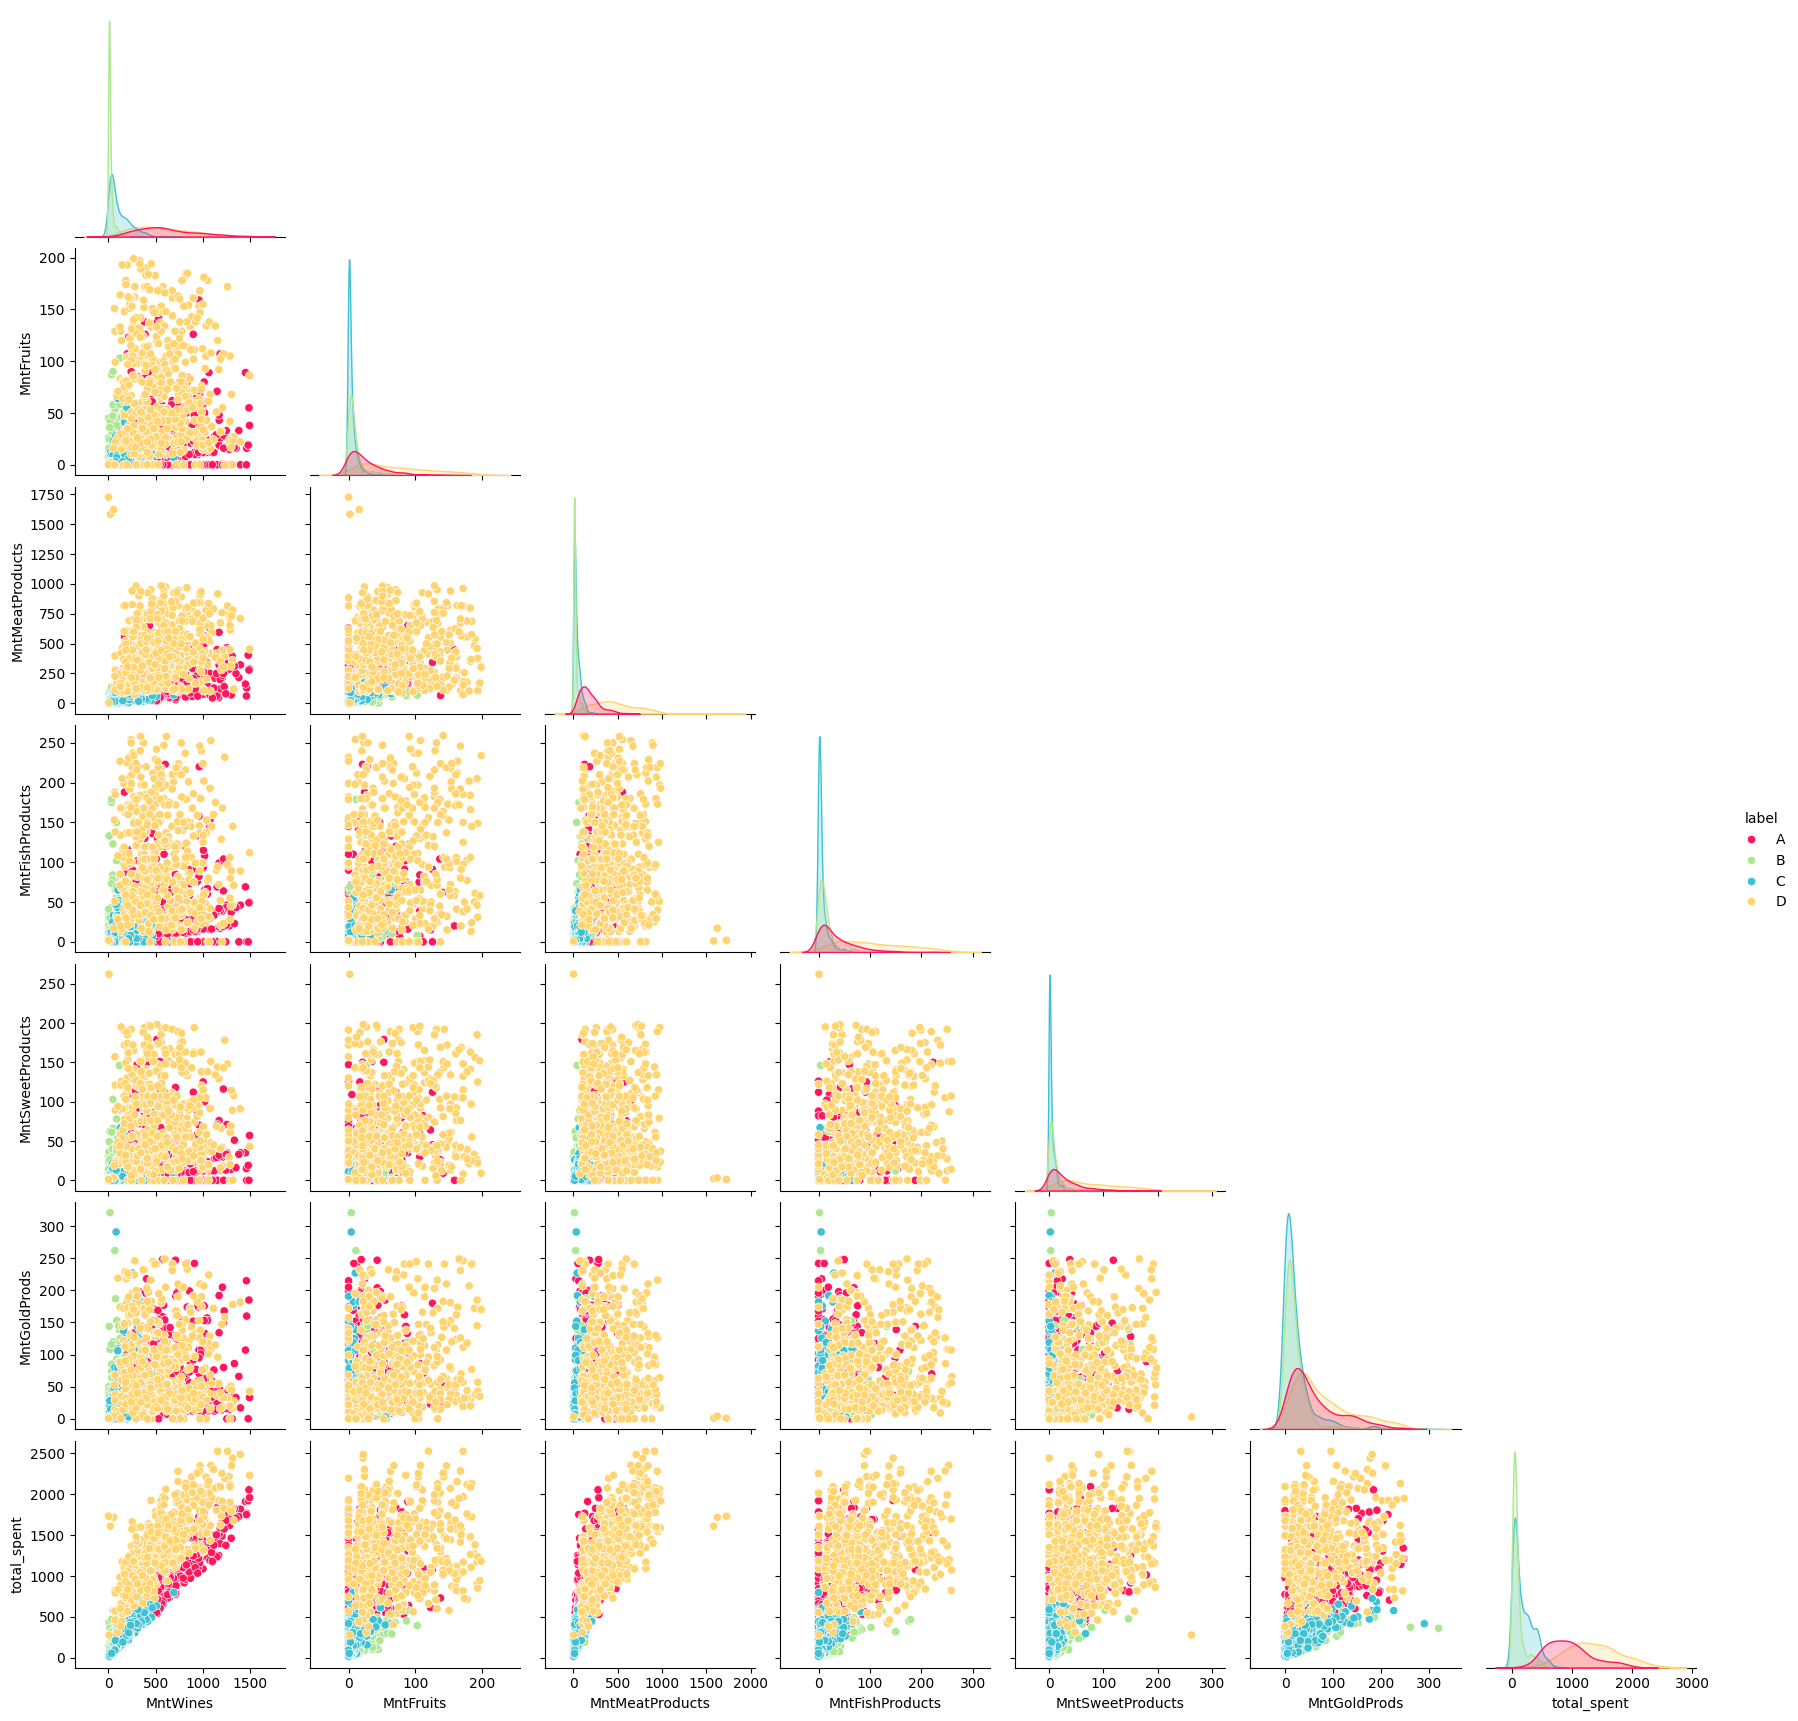

In [42]:
cols_plot_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds', 'total_spent', 'label']

sns.pairplot(data = df_plot[cols_plot_spent], hue = 'label',
             palette = color, corner = True);

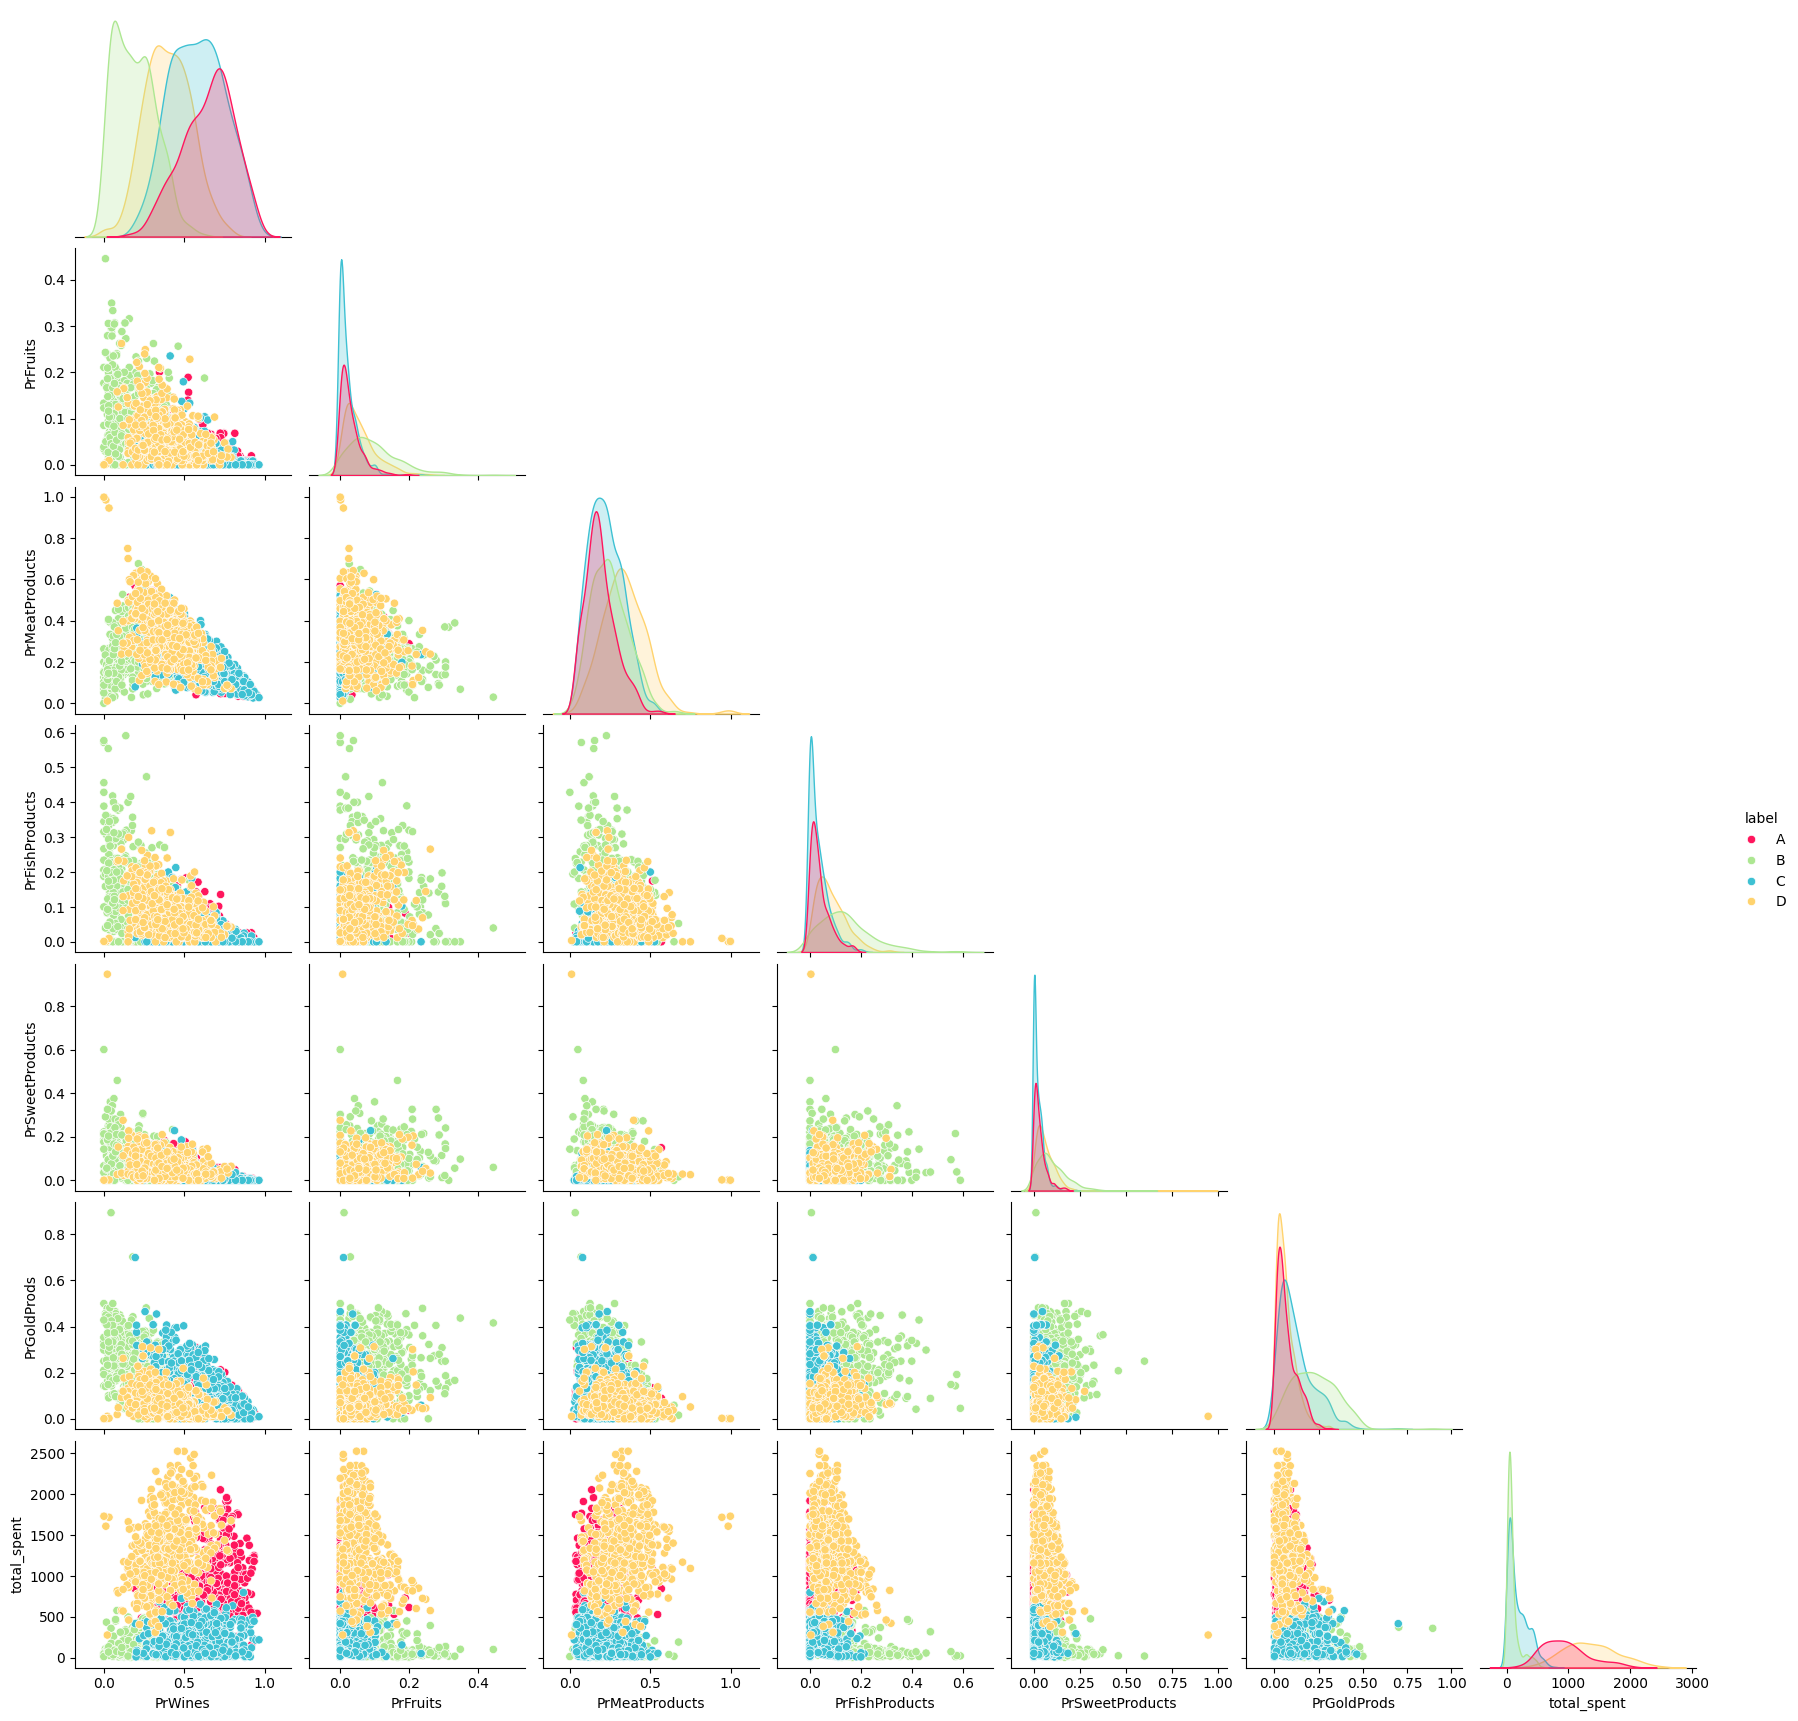

In [43]:
cols_plot_spent = ['PrWines', 'PrFruits', 'PrMeatProducts', 'PrFishProducts', 
                   'PrSweetProducts', 'PrGoldProds', 'total_spent', 'label']

sns.pairplot(data = df_plot[cols_plot_spent], hue = 'label',
             palette = color, corner = True);